In [34]:
# Import Library

# Data Manipulation
import numpy as np
import pandas as pd

# Visualizaion
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic' # font

# Datetime 
from datetime import datetime

In [35]:
# Read_csv
df = pd.read_csv('../../data/실습데이터.csv')

In [36]:
# Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [37]:
# 2022. 12. 31. 오후 10:12:33	--> 2022.12.31 형식으로 변경
df['거래일자'] = df['거래일자'].str.replace('오후', 'PM').str.replace('오전', 'AM') # '거래일자'의 오후, 오전을 PM, AM으로 변경
df['거래일자'] = pd.to_datetime(df['거래일자'], format='%Y. %m. %d. %p %I:%M:%S') # '거래일자'의 데이터 타입을 datetime으로 형변환

# '구매월', '구매일, '구매요일' Feature 생성 (str type)
df['구매월'] = df['거래일자'].dt.strftime('%m월')
df['구매일'] = df['거래일자'].dt.strftime('%d일')
df['구매요일'] = df['거래일자'].dt.strftime('%Y.%m.%d')

In [38]:
# 2022.12.31  --> 토요일 형식으로 변경
df['구매요일'] = pd.to_datetime(df['구매요일']) # 요일을 계산하기 위하여 datetime 형태로 형변환

# 숫자에 대응하는 요일 Dictionary로 정의
days = {0:'월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'}

# 숫자로 표시된 요일을 문자열로 바꾸기
df['구매요일'] = df['구매요일'].dt.weekday.apply(lambda x: days[x]) # weekday 메소드가 '거래일자'의 요일을 계산하여 숫자 형태로 반환 e.g.) 월요일 = 0, 수요일 = 2, 일요일 = 6

In [39]:
# 월, 요일별 거래금액 합계
month_price = pd.Series(df.groupby('구매월')['실거래금액'].sum())
days_price = pd.Series(df.groupby('구매일')['실거래금액'].sum())
wod_price = pd.Series(df.groupby('구매요일')['실거래금액'].sum())

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   거래id       159328 non-null  int64         
 1   유형         159328 non-null  object        
 2   고객id       159328 non-null  int64         
 3   코스ID       159328 non-null  int64         
 4   사이트        159328 non-null  object        
 5   포맷         159328 non-null  object        
 6   카테고리       159328 non-null  object        
 7   코스(상품) 이름  159328 non-null  object        
 8   거래일자       159328 non-null  datetime64[ns]
 9   쿠폰이름       159328 non-null  object        
 10  판매가격       159328 non-null  object        
 11  결제수단       159328 non-null  object        
 12  실거래금액      159328 non-null  int64         
 13  쿠폰할인액      159328 non-null  object        
 14  거래금액       159328 non-null  object        
 15  환불금액       159328 non-null  object        
 16  구매월        159328 no

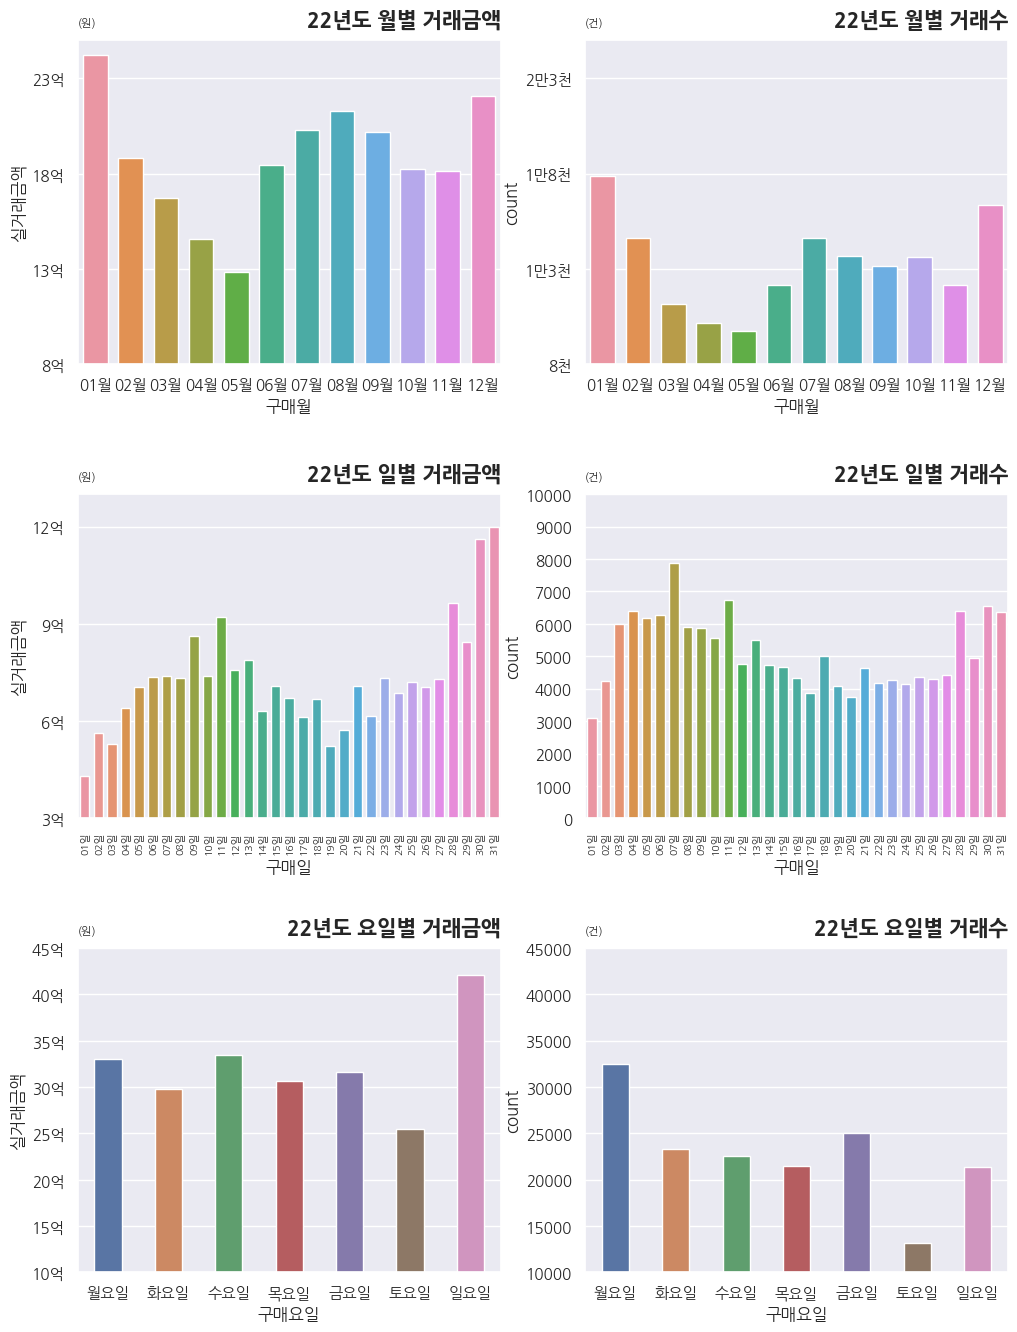

In [41]:
# 월별, 요일별 거래금액, 거래수 Visualization

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 16)) # figure 사이즈 설정
fig.subplots_adjust(hspace=0.4) # 그래프 간 간격 설정
sns.set(font="NanumGothic", style='darkgrid') # font와 graph style 설정

# 월별 거래금액 barplot

month_price_graph = sns.barplot(data=df, x=month_price.index, y=month_price,\
    order=['01월', '02월', '03월', '04월', '05월', '06월', '07월', '08월' ,'09월', '10월', '11월', '12월'],\
    errwidth=0, width=0.7, ax=ax[0][0])

month_price_graph.set_ylim(8*1e8, 25*1e8)
month_price_graph.set_yticks(np.arange(8*1e8, 26*1e8, 5*1e8), labels=['8억', '13억', '18억', '23억'])

month_price_graph.set_title('(원)', loc='left', fontsize=8)
month_price_graph.set_title('22년도 월별 거래금액', loc = 'right', fontsize = 15, fontweight = 'bold', pad=10)

# 월별 거래수 countplot

month_count_graph = sns.countplot(data=df, x='구매월', order=['01월', '02월', '03월', '04월', '05월', '06월',\
    '07월', '08월' ,'09월', '10월', '11월', '12월'], width=0.7, ax=ax[0][1]) # 월별 거래수 차트

month_count_graph.set_ylim(8000, 25000) # y축 Scailing
month_count_graph.set_yticks(np.arange(8000, 25000, 5000), labels=['8천', '1만3천', '1만8천', '2만3천'])
month_count_graph.set_title('(건)', loc='left', fontsize=8)
month_count_graph.set_title('22년도 월별 거래수', loc = 'right', fontsize = 15, fontweight = 'bold', pad=10)

# 일자별 거래금액 barplot

days_price_graph = sns.barplot(data=df, x=days_price.index, y=days_price, order=['01일', '02일', '03일', '04일',\
    '05일', '06일', '07일', '08일', '09일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일',\
    '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일'],\
    errwidth=0, width=0.7, ax=ax[1][0])

days_price_graph.set_ylim(3*1e8, 13*1e8)
days_price_graph.set_yticks(np.arange(3*1e8, 12.1*1e8, 3*1e8), labels=['3억', '6억', '9억', '12억'])
days_price_graph.tick_params(axis='x', labelrotation=90, labelsize=7.5)
days_price_graph.set_title('(원)', loc='left', fontsize=8)
days_price_graph.set_title('22년도 일별 거래금액', loc = 'right', fontsize = 15, fontweight = 'bold', pad=10)

# 일자별 거래수 countplot

days_count_graph = sns.countplot(data=df, x='구매일', order=['01일', '02일', '03일', '04일', '05일', '06일', '07일',\
    '08일' ,'09일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일',\
        '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일'], width=0.7, ax=ax[1][1])

days_count_graph.set_ylim(3000, 10000)
days_count_graph.set_yticks(np.arange(0, 10001, 1000))
days_count_graph.tick_params(axis='x', labelrotation=90, labelsize=7.5)
days_count_graph.set_title('(건)', loc='left', fontsize=8)
days_count_graph.set_title('22년도 일별 거래수', loc = 'right', fontsize = 15, fontweight = 'bold', pad=10)

# 요일별 거래금액 barplot

wod_price_graph = sns.barplot(data=df, x=wod_price.index, y=wod_price,\
    order=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'], width=0.45, ax=ax[2][0])

wod_price_graph.set_ylim(1*1e9, 45*1e8) # y축 Scailing
wod_price_graph.set_yticks(np.arange(1*1e9, 4500000001, 5*1e8), labels=['10억', '15억', '20억', '25억', '30억', '35억', '40억', '45억'])
wod_price_graph.set_title('(원)', loc='left', fontsize=8)
wod_price_graph.set_title('22년도 요일별 거래금액', loc = 'right', fontsize = 15, fontweight = 'bold', pad=10)

# 요일별 거래수 countplot

wod_count_graph = sns.countplot(data=df, x='구매요일',\
    order=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'], width=0.45, ax=ax[2][1])

wod_count_graph.set_ylim(10000, 45000) # y축 Scailing
wod_count_graph.set_title('(건)', loc='left', fontsize=8)
wod_count_graph.set_title('22년도 요일별 거래수', loc = 'right', fontsize = 15, fontweight = 'bold', pad=10)

plt.show()

## 가설

### 위의 그래프를 보고 어떤 결과를 도출해낼 수 있을까?

1. 첫 번째달은 새로운 해가 시작작 하는 달이니 만큼 새로운 결심을 세운다.그렇기에 높은 판매량을 보인다.

2. 여름 휴가철(7, 8, 9월)은 판매량이 작은 것으로 보임 -> 실제로 여름철에는 판매량이 줄어들까?

3. 월요일에 거래가 많다. 1월에 거래량이 많은것과 같은 원리로 한 주가 시작되는 월요일에 새로운 결심하여 그런걸까?

4. 3,4,5월은 유독 거래수가 작다 왜그럴까?

5. 대학생의 방학(12중순~2말, 6중순~8말)에 판매량이 높아질까? 반대로 학기중에 판매량이 낮을까? -> 패스트캠퍼스 강의 구매 고객층을 알면 도움될 것 같음

6. 일요일에 구매한 강의가 비교적 비싼 강의가 많다. 왜그럴까?

7. 월급날에 구매건수가 많을까?